# Streambook example

Streambook is a setup for writing live-updating notebooks
in any editor that you might want to use (emacs, vi, notepad).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

## Main Code

Notebook cells are separated by spaces. Comment cells are rendered
as markdown.

See https://jupytext.readthedocs.io/en/latest/formats.html#the-light-format

In [2]:
x = np.array([10, 20, 30])

Cells that end with an explicit variables are printed. 

See https://docs.streamlit.io/en/stable/api.html#magic-commands

In [3]:
x

array([10, 20, 30])

Dictionaries are pretty-printed using streamlit and can be collapsed

In [4]:
data = [dict(key1 = i, key2=f"{i}", key3=100 -i) for i in range(100)] 

Pandas dataframe also show up in tables. 

In [5]:
df = pd.DataFrame(data)
df

,key1,key2,key3
0,0,0,100
1,1,1,99
2,2,2,98
3,3,3,97
4,4,4,96
...,...,...,...
95,95,95,5
96,96,96,4
97,97,97,3
98,98,98,2


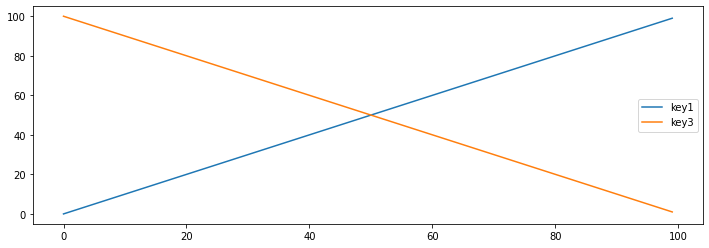

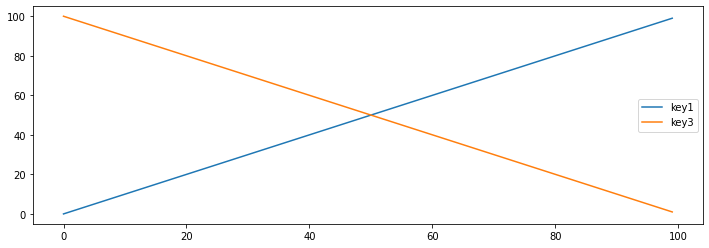

In [6]:
fig, axs = plt.subplots(figsize=(12, 4))
df.plot(ax=axs)
fig

## Advanced Features

By default, the notebook is rerun on save to ensure
consistency.

In [7]:
def simple_function(x):
    return x + 10
y = simple_function(10)
y

20

Slower functions such as functions are loading data
can be cached during development.

In [8]:
def slow_function():
    for i in range(10):
        time.sleep(0.1)
    return None
slow_function()

This uses streamlit caching behind the scenes. It will
run if the arguments or the body of the function change.

See https://docs.streamlit.io/en/stable/caching.html

## Longer example

In [9]:
def lorenz(x, y, z, s=10, r=28, b=2.667):
    """
    Given:
       x, y, z: a point of interest in three dimensional space
       s, r, b: parameters defining the lorenz attractor
    Returns:
       x_dot, y_dot, z_dot: values of the lorenz attractor's partial
           derivatives at the point x, y, z
    """
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return x_dot, y_dot, z_dot

In [10]:
dt = 0.01
num_steps = 20000

In [11]:
def calc_curve(dt, num_steps):
    # Need one more for the initial values
    xs = np.empty(num_steps + 1)
    ys = np.empty(num_steps + 1)
    zs = np.empty(num_steps + 1)

    # Set initial values
    xs[0], ys[0], zs[0] = (0., 1., 1.05)

    # Step through "time", calculating the partial derivatives at the
    # current point and using them to estimate the next point
    for i in range(num_steps):
        x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i])
        xs[i + 1] = xs[i] + (x_dot * dt)
        ys[i + 1] = ys[i] + (y_dot * dt)
        zs[i + 1] = zs[i] + (z_dot * dt)
    return xs, ys, zs
xs, ys, zs = calc_curve(dt, num_steps)

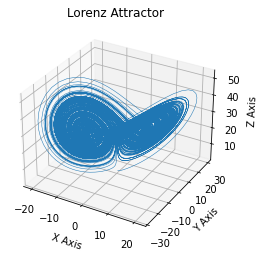

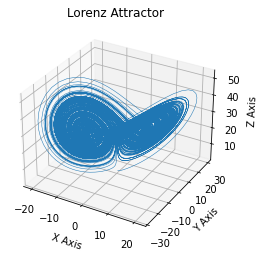

In [12]:
# Plot
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(projection='3d')
ax.plot(xs, ys, zs, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")
fig

## Exporting to Jupyter

The whole notebook can also be exported as a
Jupyter notebook.

The command is:

`jupytext --to notebook --execute example.notebook.py`

Some commands are slightly different in streamlit that jupyter.

In [13]:
# Jupyter command
from IPython.display import HTML
HTML('<img src="example.gif">')
# Streamlit command